In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Tips dataset from Seaborn
df = sns.load_dataset('tips')

# Display the first few rows
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Summary statistics
print(df.describe())

# Data types and missing values
print(df.info())


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean for numeric columns and mode for categorical columns
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='category').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print(df.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [4]:
# Count the number of occurrences for each categorical variable
print(df['sex'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())


sex
Male      157
Female     87
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


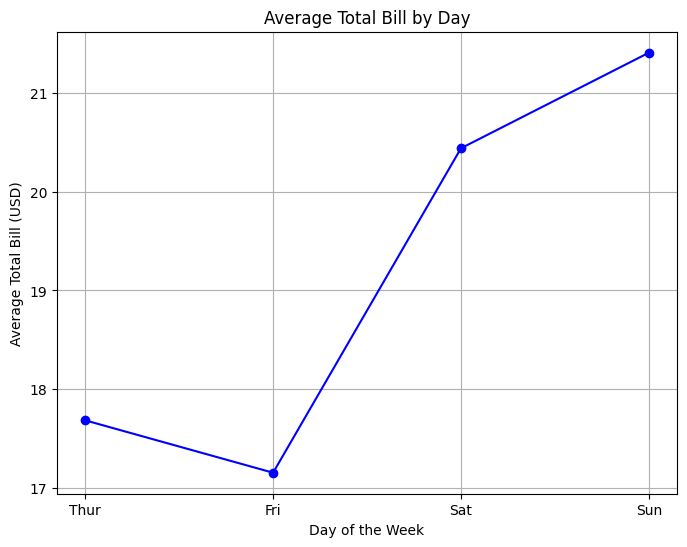

In [5]:
avg_bill_per_day = df.groupby('day')['total_bill'].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_bill_per_day.index, avg_bill_per_day.values, marker='o', linestyle='-', color='blue')
plt.title('Average Total Bill by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill (USD)')
plt.grid(True)
plt.show()


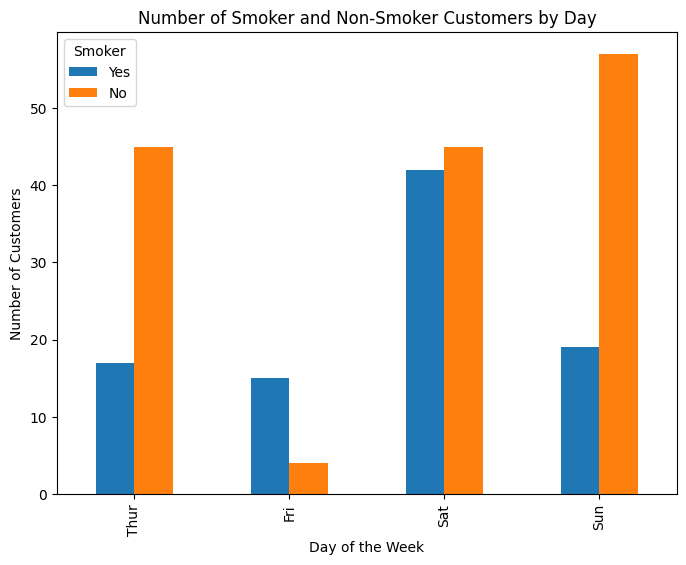

In [6]:
smoker_count = df.groupby(['day', 'smoker']).size().unstack()

smoker_count.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Smoker and Non-Smoker Customers by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.legend(title='Smoker')
plt.show()


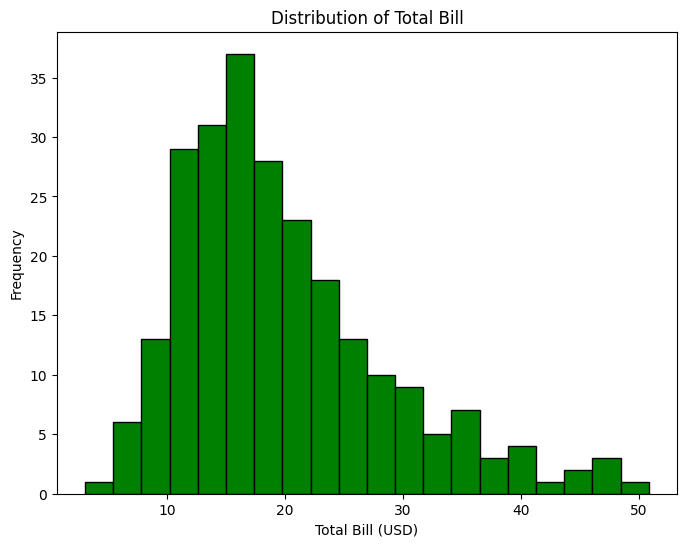

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['total_bill'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill (USD)')
plt.ylabel('Frequency')
plt.show()


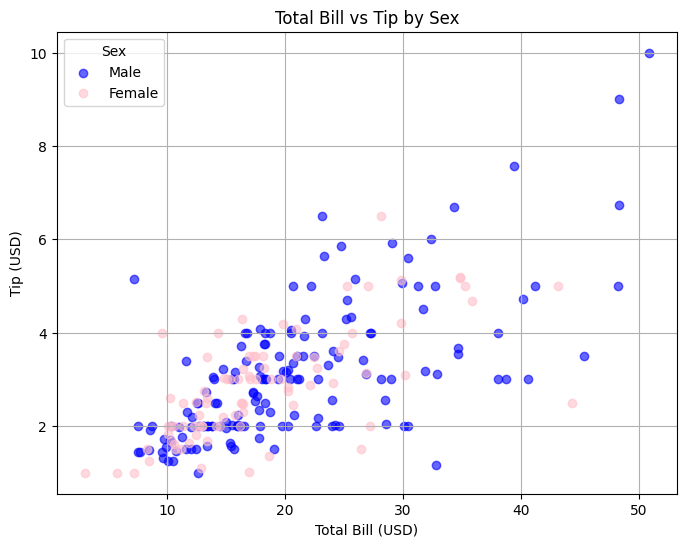

In [8]:
plt.figure(figsize=(8, 6))
for sex, color in zip(['Male', 'Female'], ['blue', 'pink']):
    subset = df[df['sex'] == sex]
    plt.scatter(subset['total_bill'], subset['tip'], label=sex, alpha=0.6, c=color)

plt.title('Total Bill vs Tip by Sex')
plt.xlabel('Total Bill (USD)')
plt.ylabel('Tip (USD)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()


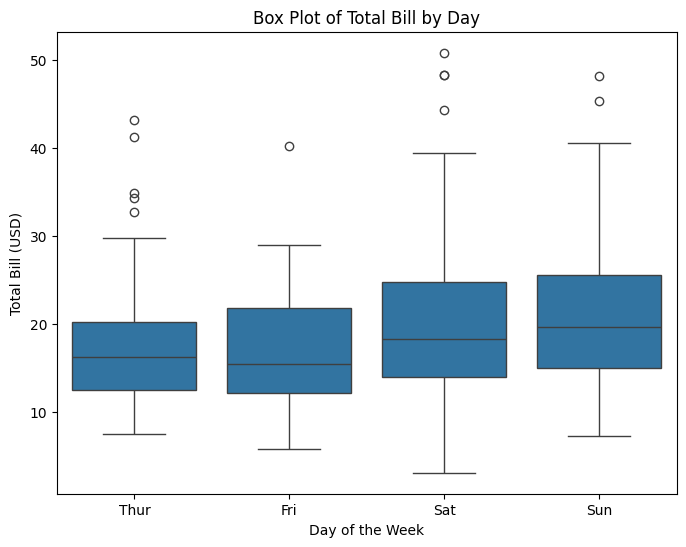

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill (USD)')
plt.show()


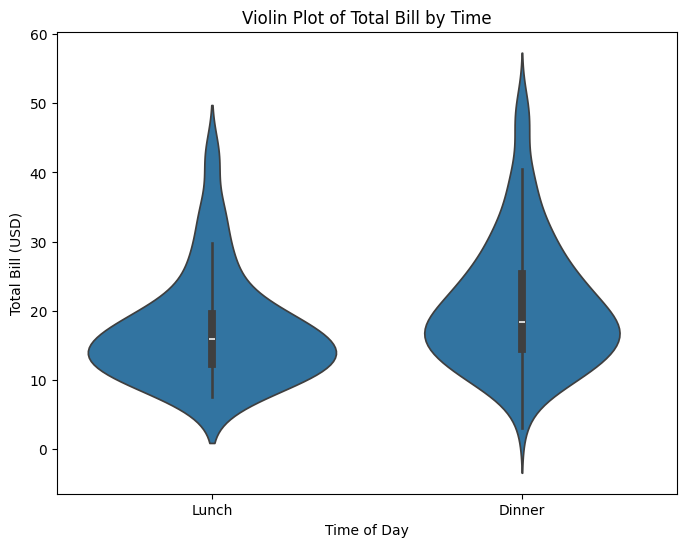

In [10]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='time', y='total_bill', data=df)
plt.title('Violin Plot of Total Bill by Time')
plt.xlabel('Time of Day')
plt.ylabel('Total Bill (USD)')
plt.show()


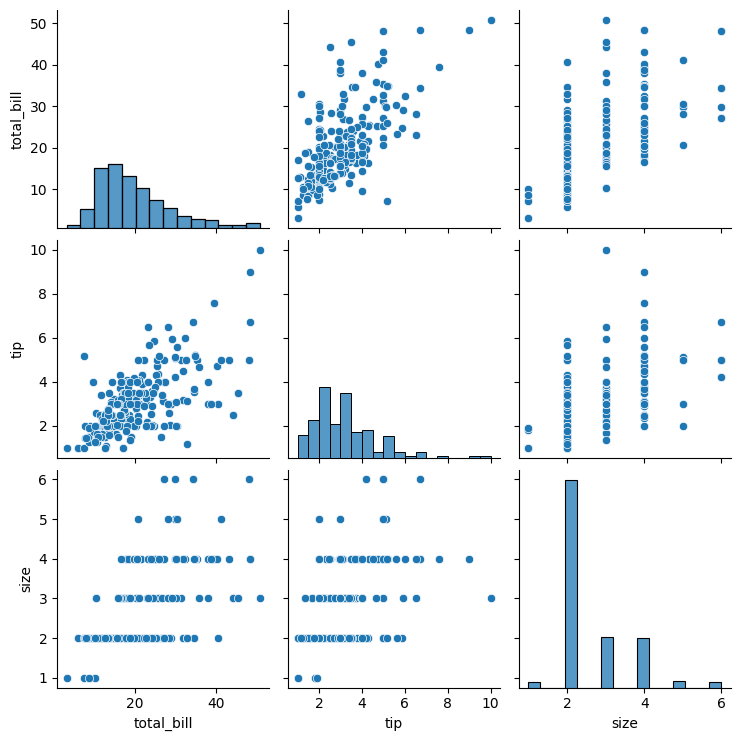

In [11]:
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()


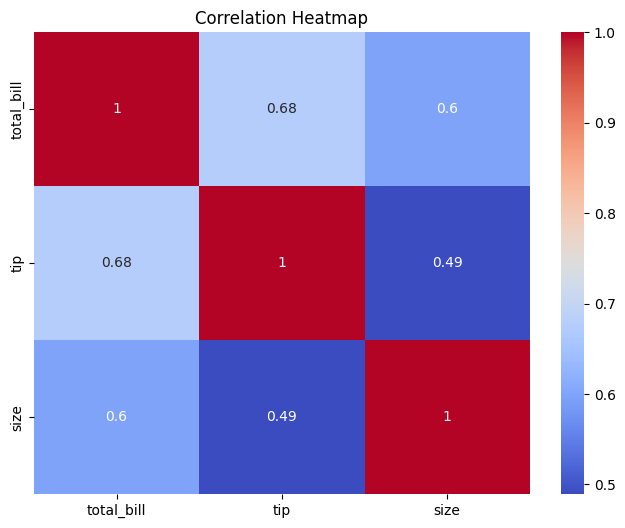

In [13]:
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


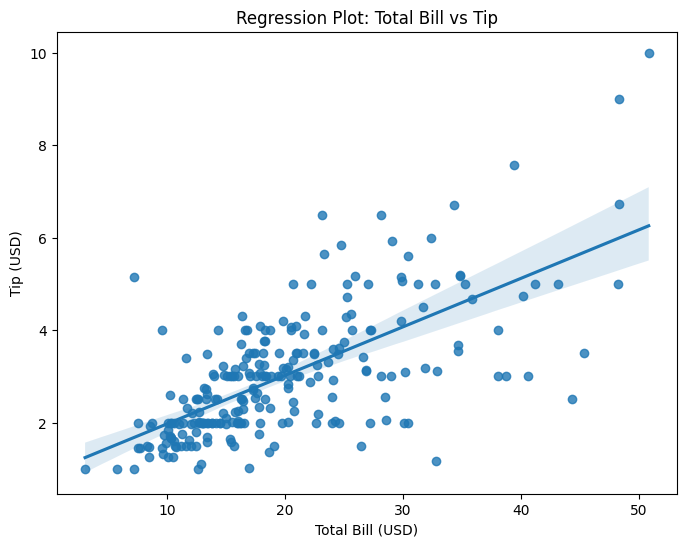

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df)
plt.title('Regression Plot: Total Bill vs Tip')
plt.xlabel('Total Bill (USD)')
plt.ylabel('Tip (USD)')
plt.show()


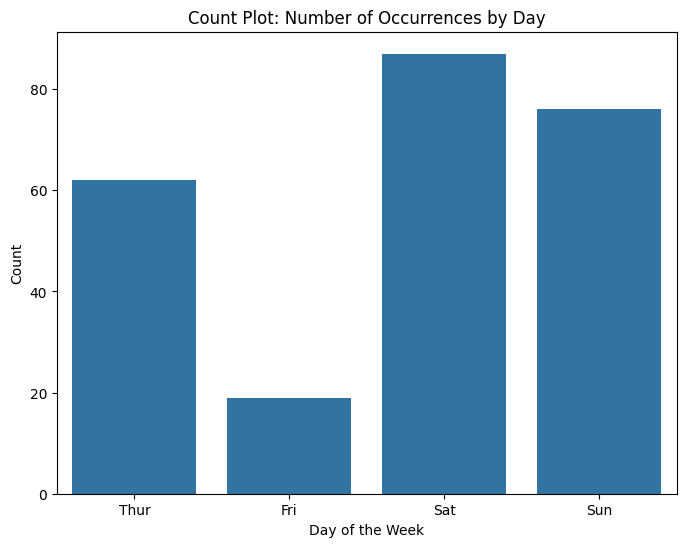

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=df)
plt.title('Count Plot: Number of Occurrences by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


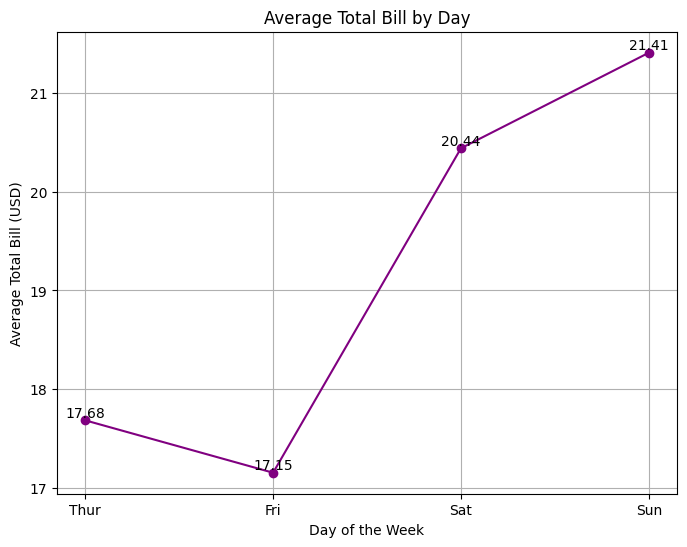

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(avg_bill_per_day.index, avg_bill_per_day.values, marker='o', linestyle='-', color='purple')
plt.title('Average Total Bill by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill (USD)')
plt.grid(True)

# Adding annotations
for i, value in enumerate(avg_bill_per_day.values):
    plt.text(avg_bill_per_day.index[i], value, f'{value:.2f}', ha='center', va='bottom')

plt.show()
